In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from MCTS_v2_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra
from Prepare_Data_Functions import load_df, subtract_baseline, normalize_df, delete_rows, plot_all_spectra_single

## Initialize and Load Data

Initialize the first iteration 

In [2]:
np.random.seed(2)
conc_array = np.random.dirichlet((1,1,1,1,1), 7)
conc_array_actual = conc_array

In [3]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

def export_to_csv(conc_array):
    sample_volume = 300 #uL 
    conc_array = conc_array*sample_volume
    for i in range(conc_array.shape[0]):
        for j in range(conc_array.shape[1]):
            if conc_array[i,j] < 5:
                conc_array[i,j] = 0
    conc_array = np.round(conc_array)
                
    df = pd.DataFrame(conc_array, columns =['red-stock', 'green-stock', 'blue-stock', 'yellow-stock', 'water-stock'])
    df.to_csv("concentration_array.csv", index = False)

def import_from_excel(filename, conc_array_actual, spectra_array_actual):
    sample_spectra = pd.read_excel(filename)
    current_gen_spectra = np.asarray(sample_spectra)
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual 

Export Concentrations as CSV

In [4]:
conc_array

array([[0.22783917, 0.01045053, 0.31737917, 0.22736508, 0.21696605],
       [0.17725331, 0.10121746, 0.42687623, 0.15745124, 0.13720177],
       [0.34751781, 0.2696863 , 0.0517533 , 0.25804238, 0.0730002 ],
       [0.25216797, 0.31531367, 0.11171905, 0.30719736, 0.01360195],
       [0.4489119 , 0.04307036, 0.35649761, 0.064759  , 0.08676113],
       [0.46410338, 0.13092325, 0.0578006 , 0.12716984, 0.22000294],
       [0.19452369, 0.0694945 , 0.3154453 , 0.2035095 , 0.217027  ]])

In [5]:
export_to_csv(conc_array)

Import UV-Vis Spectra from Excel 

In [5]:
df = load_df(r'Spectra_iteration_0.xlsx')
df = subtract_baseline(df, 'A8')
df = normalize_df(df)
df = df.drop(['A8'], axis = 1)
current_gen_spectra = np.asarray(df)
wavelength = current_gen_spectra[:,0]
current_gen_spectra = current_gen_spectra[:,1:].T

Load Desired Spectra

In [6]:
df_desired = load_df(r'Target_spectra.xlsx')
df_desired = subtract_baseline(df_desired, 'C2')
df_desired = normalize_df(df_desired)
df_desired = df_desired.drop(['C2'], axis = 1)
x_test = df_desired['C1'].values.reshape(-1,1)

Additional Steps for the Zeroth Iteration

In [7]:
spectra_array = current_gen_spectra
conc_array_actual = conc_array
spectra_array_actual = spectra_array

## Analyze Fitness of Zeroth Iteration

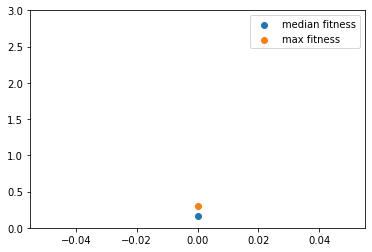

The max fitness is: 0.30570394125541833
The median fitness is: 0.1604615660019722


In [8]:
next_gen_conc, current_gen_spectra, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list = zeroth_iteration(conc_array, spectra_array, x_test)

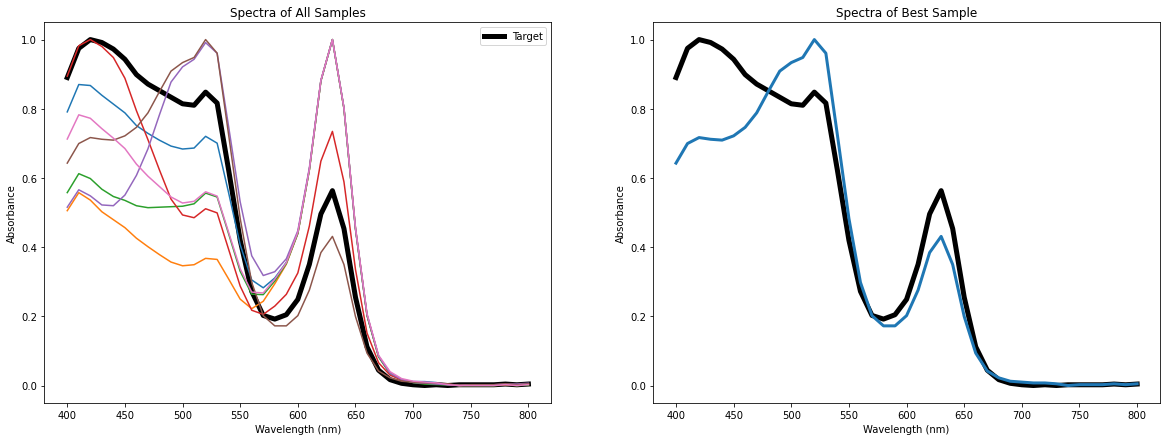

In [9]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration)

## Nth Iteration 

In [17]:
Iterations = 25
Moves_ahead = 3
GA_iterations = 6
n_samples = 7
seed = np.random.randint(1,100,1)[0]
mutation_rate, fitness_multiplier, mutation_rate_list_1, fitness_multiplier_list_1, best_move, best_move_turn, max_fitness, surrogate_score, next_gen_conc_1 = nth_iteration(Iterations, Moves_ahead, GA_iterations, n_samples, current_gen_spectra, next_gen_conc, x_test, conc_array_actual, spectra_array_actual, seed, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list)

The best move has a fitness value of 1.360557509998684
The best move occurs in 1 turns.

The surrogate model has a score of: 0.9999999999792268

[[0.31511254 0.10825295 0.12861736 0.27224009 0.17577706]
 [0.34821429 0.19196429 0.13839286 0.23839286 0.08303571]
 [0.28136882 0.01045627 0.16634981 0.34125475 0.20057034]
 [0.26098655 0.04125561 0.15784753 0.19641256 0.34349776]
 [0.29187563 0.0110331  0.12537613 0.25777332 0.31394183]
 [0.13219616 0.15884861 0.18123667 0.37739872 0.15031983]
 [0.32809773 0.21465969 0.15008726 0.23123909 0.07591623]]


In [18]:
best_move

array([[0.1       , 3.7       , 1.36055751]])

Run if satisfied with the best moves taken:

In [19]:
next_gen_conc = next_gen_conc_1
mutation_rate_list = mutation_rate_list_1
fitness_multiplier_list = fitness_multiplier_list_1

### Export Concentrations to CSV

In [14]:
export_to_csv(next_gen_conc)

Create those samples using the OT2 and perfrom UV-Vis on them

### Import Spectra from excel 

In [20]:
df = load_df(r'Spectra_iteration_2.xlsx')
df = subtract_baseline(df, 'B8')
df = normalize_df(df)
df = df.drop(['B8'], axis = 1)
current_gen_spectra = np.asarray(df)
wavelength = current_gen_spectra[:,0]
current_gen_spectra = current_gen_spectra[:,1:].T

In [21]:
conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))

Plots the maximum and median fitness of the spectras of the next batch of samples.

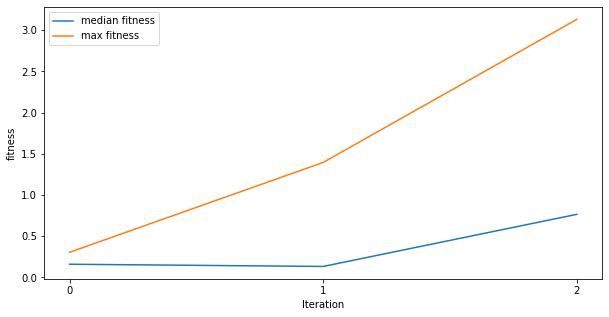

The max fitness is: 3.132846825041302
The median fitness is: 0.7662001906454929


In [22]:
median_fitness_list, max_fitness_list, iteration = plot_fitness(next_gen_conc, current_gen_spectra, x_test, median_fitness_list, max_fitness_list, iteration)

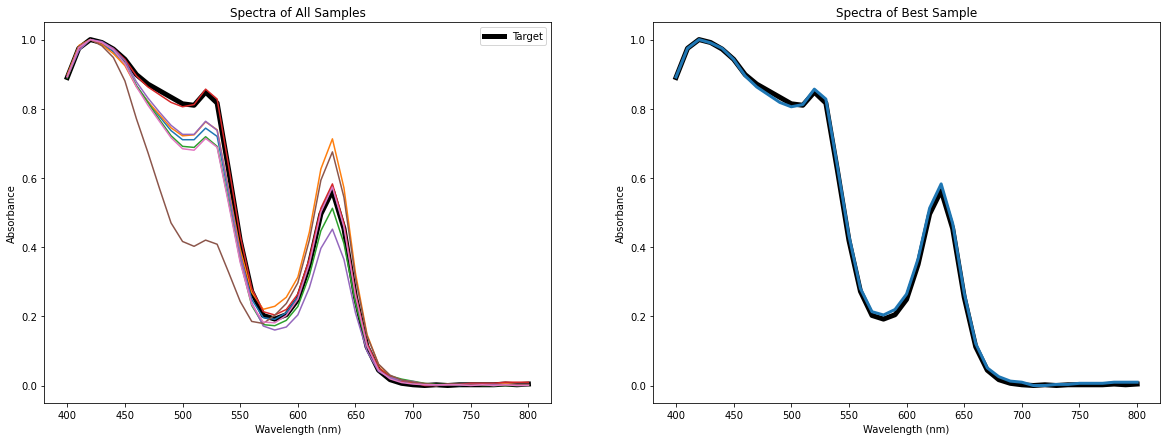

In [23]:
plot_spectra(current_gen_spectra, x_test, wavelength, iteration)

In [17]:
a = np.asarray([1,2,3])
b = np.asarray([4,5,6])

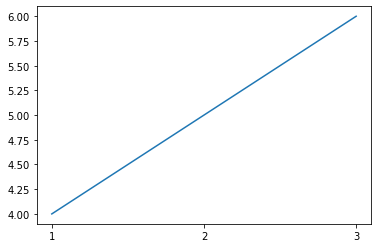

In [18]:
fig, ax = plt.subplots()
ax.plot(a,b)
ax.set_xticks(a)